In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import defaultdict
from src.plotting import plot_sim_evaluation_pv

import seaborn as sns
sns.set_theme(palette="colorblind")
sns.set_style("white", {'axes.grid': False})

matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "12"

In [2]:
from src.pv.pv import read_pv_data


df = read_pv_data("../pv_150kW.csv")
df.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,2004-12-31 16:30:00-08:00,15886.5,149.54,3.42,11.79,1.72,0.0
1,2004-12-31 17:30:00-08:00,0.0,0.00,0.00,10.53,1.24,0.0
2,2004-12-31 18:30:00-08:00,0.0,0.00,0.00,9.40,0.76,0.0
3,2004-12-31 19:30:00-08:00,0.0,0.00,0.00,9.44,0.28,0.0
4,2004-12-31 20:30:00-08:00,0.0,0.00,0.00,8.98,0.41,0.0


In [3]:
tz = df.loc[0].time.tz

In [4]:
from datetime import date, datetime


start = datetime(2019, 6, 1, tzinfo=tz)
end = datetime(2019, 6, 2, tzinfo=tz)

example = df.loc[(start <= df.time) & (df.time <= end)]
example.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
126344,2019-06-01 01:30:00-07:00,0.0,0.0,0.00,13.37,0.62,0.0
126345,2019-06-01 02:30:00-07:00,0.0,0.0,0.00,13.07,0.62,0.0
126346,2019-06-01 03:30:00-07:00,0.0,0.0,0.00,13.07,0.48,0.0
126347,2019-06-01 04:30:00-07:00,0.0,0.0,0.00,12.92,0.41,0.0
126348,2019-06-01 05:30:00-07:00,0.0,0.0,-3.01,12.94,0.55,0.0


In [5]:
from datetime import timedelta

starts = [
    datetime(2018, 6, 1, tzinfo=tz),
    datetime(2019, 6, 1, tzinfo=tz),
    datetime(2020, 6, 1, tzinfo=tz)
]


examples = [
    df.loc[(start <= df.time) & (df.time <= start + timedelta(days=1))] for start in starts
]

In [6]:
example = examples[0]

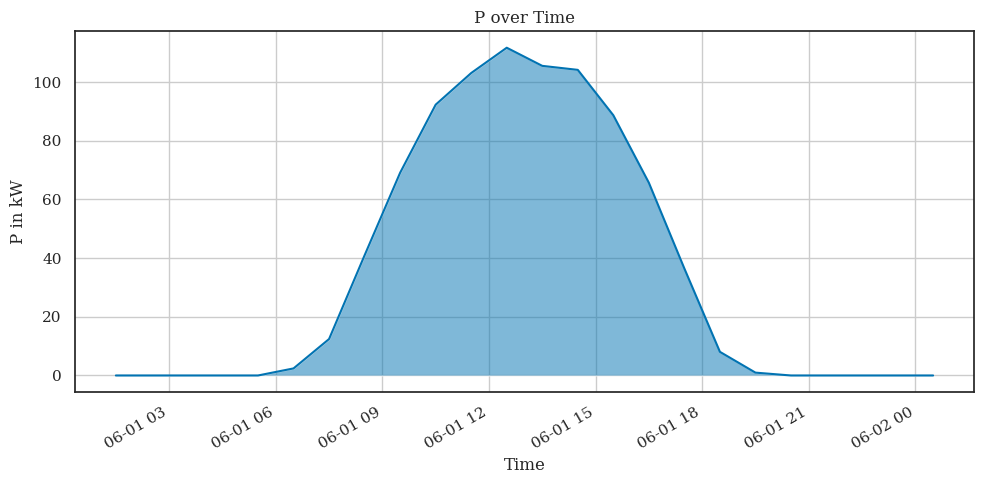

In [7]:
# # Assuming df is already defined
# df['time'] = pd.to_datetime(df['time'])  # Ensure 'time' is datetime

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

y = example.P / 1000
x = example.time

# Plot P vs. time
ax.plot(x, y, marker='', linestyle='-')
ax.fill_between(x, y, alpha=0.5)

# Set titles and labels
ax.set_title('P over Time')
ax.set_xlabel('Time')
ax.set_ylabel('P in kW')

# Improve formatting
ax.grid(True)
fig.autofmt_xdate()  # Automatically format x-axis dates

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
# example = examples[i]
# x = example['time']
# x = x.apply(lambda x: x.replace(year=2019))
# x

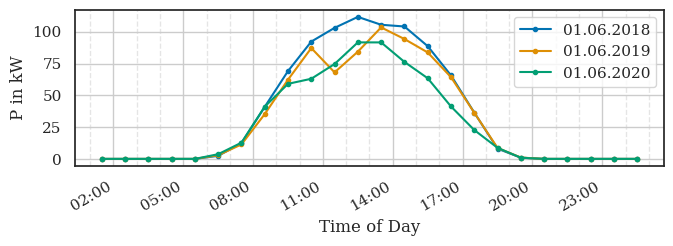

In [11]:
from matplotlib.ticker import MultipleLocator
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

m = 2.3
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(
    3 * m, 1.2 * m), tight_layout=True, sharey=True)

ax = axes

hour_formatter = mdates.DateFormatter('%H:%M', tz=tz)

color = color_cycle = plt.rcParams['axes.prop_cycle'].by_key()[
    'color'][8]  # yellow

# for i, ax in enumerate(axes):
for i in range(3):
    example = examples[i]
    x = example['time'].apply(lambda x: x.replace(year=2019))
    y = example['P'] / 1000  # Convert to kW
    
    dt = starts[i]

    ax.plot(x, y, linestyle='-', marker=".", label=f"{dt.day:02d}.{dt.month:02d}.{dt.year}")
    # ax.fill_between(x, y, alpha=0.3)
    ax.set_xlabel('Time of Day')

    # ax.set_title(f"{dt.day:02d}.{dt.month:02d}.{dt.year}")
    ax.xaxis.set_major_formatter(hour_formatter)  # Format x-axis to show hours
    
    major_locator = mdates.HourLocator(interval=3)  # every 3 hours
    minor_locator = mdates.HourLocator(interval=1)
    
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)

    ax.grid(True)
    # Enable grid on minor ticks only (which are at every integer)
    ax.grid(True, which='minor', axis='x',
            linestyle='--', color='gray', alpha=0.2)

ax.legend()
# Set title and y-label on the first axis
# axes[0].set_ylabel('P in kW')
ax.set_ylabel("P in kW")

# Auto-format x-axis labels and adjust layout
fig.autofmt_xdate()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

fig.savefig("pv-example.pdf", dpi=300, bbox_inches="tight")